In [2]:
N = (1 + 4 ) % 5 + 1

In [3]:
print(N)

1


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
FILE_PATH = "./NationalNames.csv"

data = pd.read_csv(FILE_PATH)

In [6]:
# 1. Виведіть перші 8 рядків набору даних.

data.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [7]:
# 2. Вивести останні 8 рядків набору даних.

data.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [8]:
# 3. Отримайте імена стовпців набору даних

data.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

In [9]:
# 5. Знайдіть кількість унікальних імен у наборі даних

data['Name'].nunique()

93889

In [10]:
# 10. Підрахуйте кількість унікальних імен у кожному році

data.groupby('Year')['Name'].nunique()

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64

In [11]:
# 11. Знайдіть рік із найбільшою кількістю унікальних імен.

unique_names_per_year = data.groupby('Year')['Name'].nunique()

year_with_most_unique_names = unique_names_per_year.idxmax()
max_unique_names_count = unique_names_per_year.max()


pd.DataFrame({'Year': [year_with_most_unique_names], 'Name': [max_unique_names_count]})

,Year,Name
0,2008,32488


In [12]:
# 12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних 
# імен (тобто у 2008 році)

names_in_max_year = pd.Series(data[data['Year'] == year_with_most_unique_names]['Name'])
names_in_max_year.value_counts().idxmax()



'Lorin'

In [13]:
# 13. Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих 
# імен

female_names = data[data['Gender'] == 'F']

jacob_data = female_names[female_names['Name'] == 'Jacob']

jacob_count_by_year = jacob_data.groupby('Year').agg({'Count': 'sum'}).reset_index()

most_popular_jacob = jacob_count_by_year.loc[jacob_count_by_year['Count'].idxmax()]

result = jacob_data[jacob_data['Year'] == most_popular_jacob['Year']]

result



,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


In [14]:
# 14. Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові 
# чоловічі та жіночі імена)

name_counts = data.groupby(['Year' ,'Name', 'Gender']).size()

def find_gender_neutral_names(group):
    male_names = set(group[group['Gender'] == 'M']['Name'])
    female_names = set(group[group['Gender'] == 'F']['Name'])
    return pd.Series({'gender_neutral_count': len(male_names.intersection(female_names))})

gender_neutral_counts = data.groupby('Year').apply(find_gender_neutral_names).reset_index()
gender_neutral_counts = gender_neutral_counts.set_index('Year')['gender_neutral_count']

pd.DataFrame({'Year': [gender_neutral_counts.idxmax()], '': [gender_neutral_counts.max()]})


/tmp/ipykernel_60041/725569115.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gender_neutral_counts = data.groupby('Year').apply(find_gender_neutral_names).reset_index()


,Year,
0,2008,2557


In [15]:
# 15. Знайдіть загальну кількість народжень за рік.

data.groupby('Year')['Count'].sum().sort_index()


Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64

In [16]:
# 16. Знайдіть рік, коли народилося найбільше дітей

total_births = data.groupby('Year')['Count'].sum().sort_index()

total_births.idxmax()

np.int64(1957)

In [17]:
# 17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного року

data.groupby(['Year', 'Gender'])['Count'].sum().unstack()


Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


In [18]:
# 18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж 
# хлопчиків.

births_by_gender_year = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()

# Знайти роки, коли кількість дівчаток перевищувала кількість хлопчиків
years_more_females = births_by_gender_year[births_by_gender_year['F'] > births_by_gender_year['M']]

# Підрахувати кількість таких років
num_years_more_females = years_more_females.shape[0]

num_years_more_females

54

In [19]:
# 21. Порахуйте, скільки разів хлопчиків називали Barbara

barbara_boys = data[(data['Gender'] == 'M') & (data['Name'] == 'Barbara')]

barbara_boys['Count'].sum()



np.int64(4139)

In [20]:
# 22. Підрахуйте скільки років проводилось спостереження

observation_duration = data['Year'].nunique()

f'Спостереження тривало {observation_duration} років'

'Спостереження тривало 135 років'

<Figure size 1000x600 with 0 Axes>

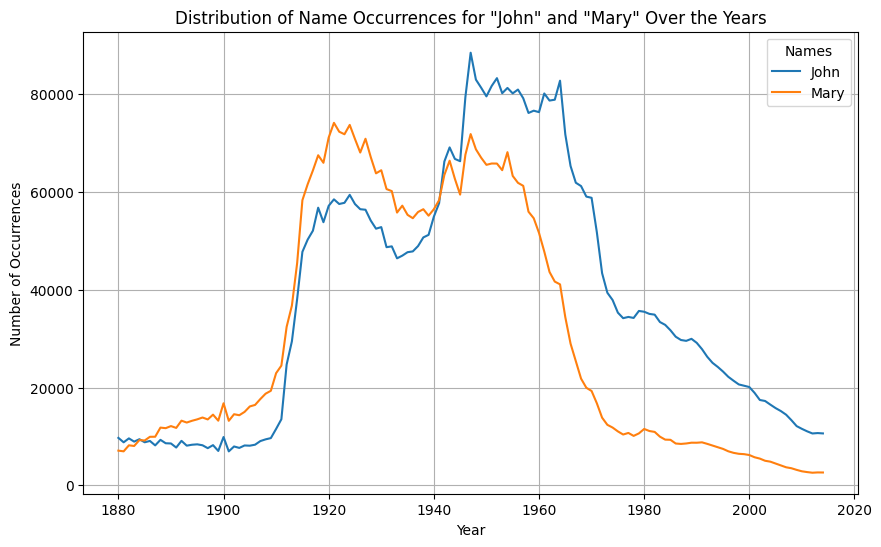

In [21]:
# 25

filtered_data = data[data['Name'].isin(['John', 'Mary'])]

# Step 2: Group by Year and Name, and sum the counts
grouped_data = filtered_data.groupby(['Year', 'Name'])['Count'].sum().unstack()

# Step 3: Plot the distribution of the names 'John' and 'Mary'
plt.figure(figsize=(10,6))
grouped_data.plot(kind='line', figsize=(10,6))

# Customize the plot
plt.title('Distribution of Name Occurrences for "John" and "Mary" Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend(title="Names")
plt.grid(True)

# Show the plot
plt.show()

In [29]:
# 23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні 
# кожного року)

years = data['Year'].unique()

names_by_gender_year = data.groupby(['Name', 'Gender', 'Year']).size().reset_index(name='Count')
neutral_names = names_by_gender_year.groupby('Name').filter(
    lambda x: x['Year'].nunique() == len(years) and x['Gender'].nunique() > 1
)

popular_neutral_names = neutral_names.groupby('Name')['Count'].sum().sort_values(ascending=False).head(16).reset_index()

popular_neutral_names['Name']



0        Jean
1      Jessie
2        John
3      Joseph
4     Johnnie
5       Jesse
6      Sidney
7       Ollie
8         Lee
9      Leslie
10     Robert
11     Marion
12    William
13     Tommie
14    Francis
15      James
Name: Name, dtype: object

In [31]:
# 24. Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, 
# яким називали дітей найбільшу кількість разів )

unpopular_names_counts = {}
for year in data['Year'].unique():
    yearly_data = data[data['Year'] == year]
    min_count = yearly_data['Count'].min()
    least_popular_names = yearly_data[yearly_data['Count'] == min_count]
    for _, row in least_popular_names.iterrows():
        name = row['Name']
        count = row['Count']

        if name in unpopular_names_counts:
            unpopular_names_counts[name] += count
        else:
            unpopular_names_counts[name] = count

unpopular_names_df = pd.DataFrame(list(unpopular_names_counts.items()), columns=['Name', 'TotalCount'])
most_popular_unpopular_name = unpopular_names_df.loc[unpopular_names_df['TotalCount'].idxmax()]

print("Найбільш популярну з непопулярних імен:")
print(most_popular_unpopular_name)

Найбільш популярну з непопулярних імен:
Name          Celester
TotalCount         160
Name: 3668, dtype: object
